In [1]:
from Modules import Ingenierie, data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year_list = range(2016,2020)
all_data=data.load_data(year_list)

Loading data for season 2016
Data for season 2016 loaded successfully.
Loading data for season 2017
Data for season 2017 loaded successfully.
Loading data for season 2018
Data for season 2018 loaded successfully.
Loading data for season 2019
Data for season 2019 loaded successfully.


In [3]:
# Process the loaded data
combined_shots_data = Ingenierie.process_loaded_games(all_data)
combined_shots_data.to_csv('dataframe/combined_shots_data.csv', index=False)

In [4]:
combined_shots_data.head(5)

,shot_distance,shot_angle,is_goal,empty_net
0,51.429563,26.565051,0,1
1,30.083218,21.447736,0,1
2,13.000000,22.619865,0,0
3,33.060551,3.468229,0,1
4,38.078866,-13.671307,0,0


# Histogramme du nombre de tirs (buts et non-buts séparés), regroupées (binned) par distance

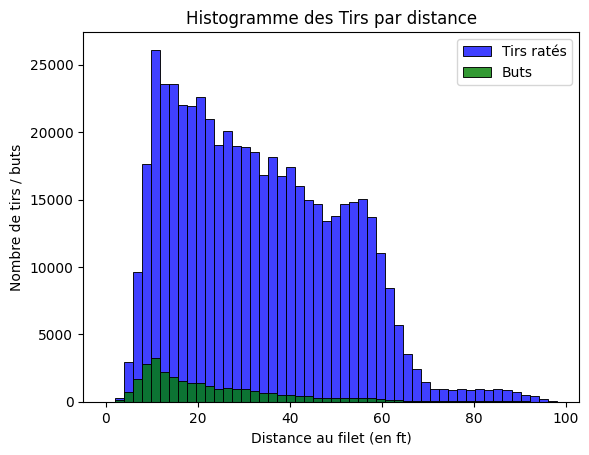

In [33]:
# Histogramme de la distance des tirs avec distinction entre buts et non-buts
sns.histplot(combined_shots_data[combined_shots_data['is_goal'] == 0], color = 'blue', x = 'shot_distance', bins = 50, label= 'Tirs ratés')
sns.histplot(combined_shots_data[combined_shots_data['is_goal'] == 1], alpha = 0.8, color = 'green', x = 'shot_distance', bins = 50, label = 'Buts')
plt.title('Histogramme des Tirs par distance')
plt.xlabel('Distance au filet (en ft)')
plt.ylabel('Nombre de tirs / buts')
plt.legend()
plt.show()


Ce graphique présente la distribution des tirs en fonction de leur distance au filet, en distinguant les tirs réussis (buts) et les tirs manqués. Les tirs manqués (en bleu) constituent une majorité écrasante par rapport aux tirs réussis (en vert), quelle que soit la distance. Cela reflète une réalité bien connue du hockey : la difficulté de marquer un but augmente avec la distance.

En observant les barres, on constate que la majorité des tirs sont effectués à une distance relativement courte, généralement entre 10 et 30 pieds. Les tirs à courte distance ont également un pourcentage légèrement plus élevé de succès, bien que les buts restent une minorité même dans cette zone. À mesure que la distance augmente, le nombre total de tirs diminue fortement, et les tirs réussis deviennent extrêmement rares au-delà de 50 pieds.

Ces observations renforcent l'idée que la proximité du filet est un facteur clé pour maximiser les chances de marquer, bien que d'autres éléments comme l'angle, le type de tir et la situation de jeu aient également une influence significative. Ce graphique met en évidence l'importance d'intégrer la distance comme caractéristique dans notre modèle prédictif des buts.

![Histogramme Tirs par Distance](images\fe1_histo_tir_par_distance.png) 

# Histogramme de l'angle des tirs avec distinction entre buts et non-buts

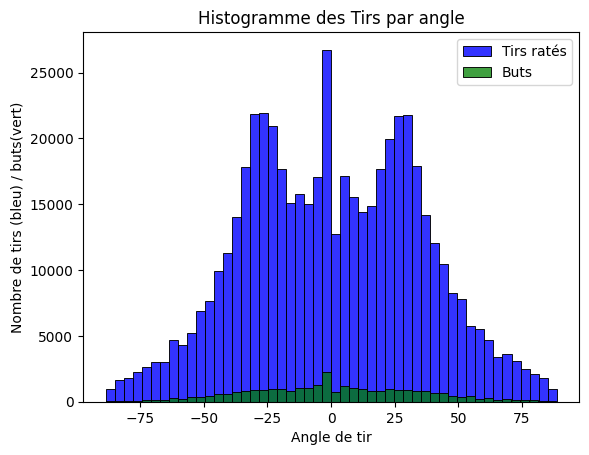

In [34]:
# Histogramme de l'angle des tirs avec distinction entre buts et non-buts
sns.histplot(combined_shots_data[combined_shots_data['is_goal'] == 0], color = 'blue', alpha = 0.8, x = 'shot_angle', bins = 50, label = 'Tirs ratés')
sns.histplot(combined_shots_data[combined_shots_data['is_goal'] == 1], color = 'green', x = 'shot_angle', bins = 50, label = 'Buts')
plt.xlabel('Angle de tir')
plt.ylabel('Nombre de tirs (bleu) / buts(vert)')
plt.title('Histogramme des Tirs par angle')
plt.legend()
plt.show()


En examinant l'impact de l'angle des tirs, nous observons que les tirs alignés avec l'axe central (autour de 0 degré) sont significativement plus nombreux et présentent une proportion plus élevée de buts. Cela peut être attribué à une meilleure perspective du joueur et à une diminution des interférences défensives. Les tirs effectués à des angles extrêmes, bien que rares, ont des taux de réussite beaucoup plus faibles, ce qui s'explique par des perspectives limitées et des chances de placement plus difficiles.

![Histogramme Tir par angle](images\fe1_histo_tir_par_angle.png) 

# Histogramme 2D pour distance vs angle

Text(37.722222222222214, 0.5, 'Angle de tir')

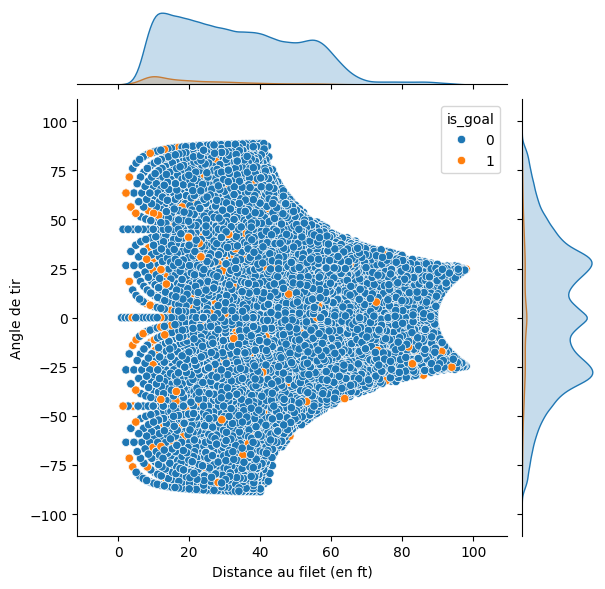

In [20]:
# Histogramme 2D pour distance vs angle
sns.jointplot(data = combined_shots_data, x = 'shot_distance', y = 'shot_angle', hue ='is_goal')
plt.xlabel('Distance au filet (en ft)')
plt.ylabel('Angle de tir')

La visualisation 2D combinant la distance et l'angle des tirs met en évidence la répartition des tirs réussis et ratés en fonction de leur position sur la patinoire. Les tirs situés à proximité du filet (distances inférieures à 20 pieds) montrent une densité notablement plus élevée de buts, signalée par la concentration des points orange. À mesure que la distance augmente, la proportion de tirs ratés (points bleus) devient prépondérante. Cette tendance est renforcée par l'angle des tirs : les tirs effectués à des angles plus proches de l'axe central (environ 0 degré) semblent avoir une probabilité plus élevée de succès. Cela peut s'expliquer par une visibilité accrue et des opportunités de placement plus directes pour les tirs effectués dans cet intervalle.

![Histogramme 2D](images\fe1_histo_2d_angle_distance.png) 

# Histogrammes du Taux de but en fonction de la distance du tir et en fonction de l'angle du tir

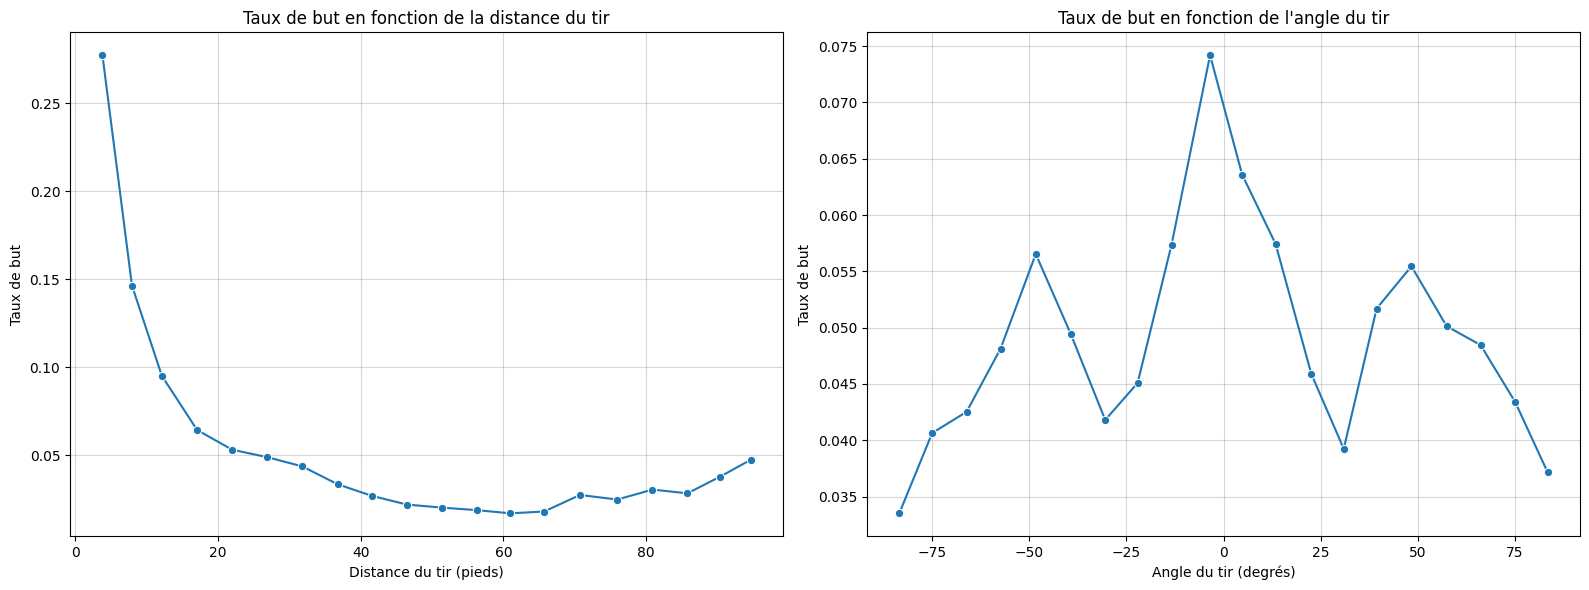

In [32]:
# Créer des colonnes temporaires pour les intervalles de distance et d'angle
distance_bins = pd.cut(combined_shots_data['shot_distance'], bins=20, labels=False)
angle_bins = pd.cut(combined_shots_data['shot_angle'], bins=20, labels=False)

# Calculer le taux de but par distance sans modifier le DataFrame original
goal_rate_by_distance = combined_shots_data.groupby(distance_bins)['is_goal'].mean()
distance_midpoints = combined_shots_data.groupby(distance_bins)['shot_distance'].mean()

# Calculer le taux de but par angle sans modifier le DataFrame original
goal_rate_by_angle = combined_shots_data.groupby(angle_bins)['is_goal'].mean()
angle_midpoints = combined_shots_data.groupby(angle_bins)['shot_angle'].mean()

# Créer une figure avec deux sous-graphiques côte à côte
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Taux de but par distance (ligne continue)
sns.lineplot(x=distance_midpoints, y=goal_rate_by_distance, marker="o", ax=ax[0])
ax[0].set_xlabel("Distance du tir (pieds)")
ax[0].set_ylabel("Taux de but")
ax[0].set_title("Taux de but en fonction de la distance du tir")
ax[0].grid(alpha=0.5)

# Taux de but par angle (ligne continue)
sns.lineplot(x=angle_midpoints, y=goal_rate_by_angle, marker="o", ax=ax[1])
ax[1].set_xlabel("Angle du tir (degrés)")
ax[1].set_ylabel("Taux de but")
ax[1].set_title("Taux de but en fonction de l'angle du tir")
ax[1].grid(alpha=0.5)

plt.tight_layout()
plt.show()

L'analyse du taux de réussite des buts met en évidence des tendances claires. Pour la distance, nous constatons une décroissance rapide du taux de réussite à mesure que la distance augmente. Les tirs effectués à moins de 10 pieds montrent un taux de réussite exceptionnellement élevé, atteignant plus de 25 %, tandis que les tirs au-delà de 40 pieds ont des taux négligeables. Concernant l'angle, une dynamique oscillante est observée : les tirs alignés avec l'axe central (0 degré) ont le plus haut taux de réussite, suivi par des pics secondaires autour de -25 et 25 degrés. Les angles extrêmes, dépassant ±75 degrés, affichent les taux les plus faibles.

Ces analyses soulignent l'importance de la proximité et de l'alignement avec l'axe central pour maximiser les chances de réussite des tirs. Ces observations nous guident dans l'extraction de caractéristiques clés et l'entraînement de modèles prédictifs robustes pour estimer la probabilité de but.

![Histogramme Taux de but en fonction angle et distance](images\fe1_histo_taux_angle_distance.png) 

# Histogramme de Nombres de buts par distance 

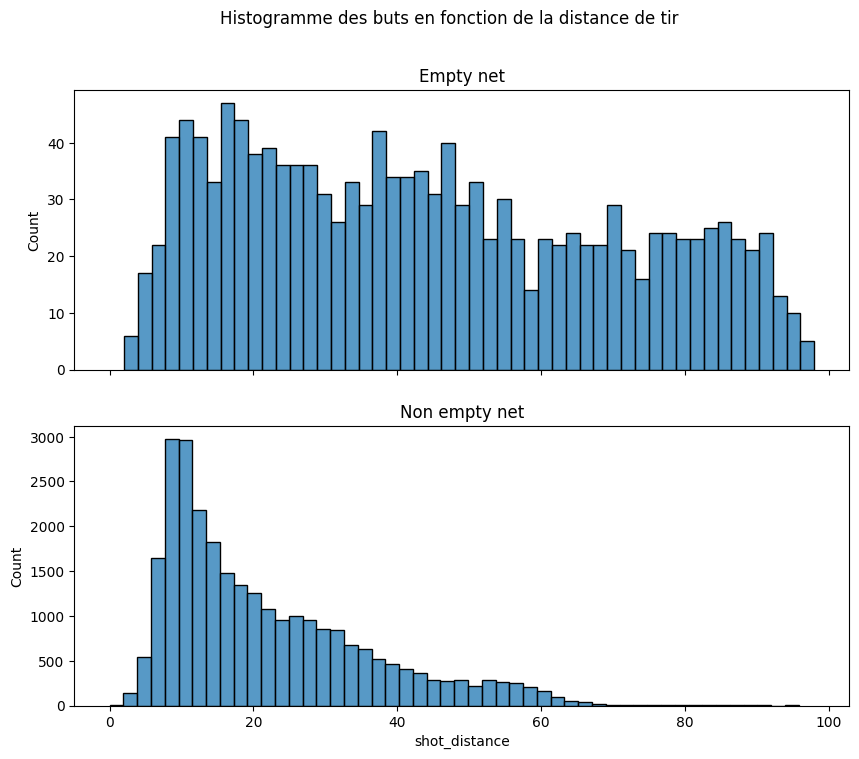

In [26]:
def hist_for_goals(df: pd.DataFrame):
    # On récupère les évènements de type 'Goal' uniquement
    goal_df = df[df["is_goal"] == 1]

    # Affichage des histogrammes
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    sns.histplot(
        goal_df[goal_df["empty_net"] == 1], x="shot_distance", bins=50, ax=axes[0]
    )
    axes[0].set_title("Empty net")

    sns.histplot(
        goal_df[goal_df["empty_net"] == 0], x="shot_distance", bins=50, ax=axes[1]
    )
    axes[1].set_title("Non empty net")

    plt.suptitle("Histogramme des buts en fonction de la distance de tir")

hist_for_goals(combined_shots_data)

L'histogramme des buts distingue deux contextes majeurs : les tirs effectués sur un filet vide et ceux réalisés contre un gardien en place. Dans le cas des filets vides, les buts sont relativement uniformément répartis quelle que soit la distance, bien que l'on note un léger pic autour des 20 pieds. Cette uniformité illustre que l'absence de gardien réduit considérablement l'impact de la distance sur le succès du tir. À l'inverse, pour les filets non vides, une forte concentration des buts est observée à des distances inférieures à 20 pieds. Au-delà de cette limite, la probabilité de succès diminue drastiquement, soulignant l'importance de la proximité dans la réussite des tirs contre un gardien actif.

![Histogramme Buts par distance](images\fe1_histo_but_distance.png) 